# Machine Learning Exercise 4-2
## Question 2 : DBSCAN Implementation
By Gholamreza Dar

https://gholamrezadar.ir/

Feb 2022


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML_HW04.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")
import pandas as pd

plt.rcParams['figure.dpi'] = 150

## Functions

### def search( )

In [ ]:
def search(p, distances, eps, min_pts, labels, current_cluster, start=True, debug=False):
  # Count the number of neighbors in eps neighborhood
  neighbors = np.where(distances[p]<eps)[0]
  # min_pts check
  if len(neighbors) > min_pts:
    # p is Core
    if debug:
      print(f"{p} is a core!")
    labels[p] = current_cluster
    # for each neighbor of p
    for q in neighbors:
      # Skip if q is already in some cluster
      if labels[q] != -1:
        continue
      # Neighbors of p
      neighbors = np.where(distances[p]<=eps)[0]
      # min_pts check
      if len(neighbors) > min_pts:
        # q is Core
        labels[p] = current_cluster
        search(q,
               distances,
               eps,
               min_pts,
               labels,
               current_cluster,
               start=False,
               debug=debug)

  if not start:
    # p is Border
    labels[p] = current_cluster
    if debug:
      print(f"{p} is a border!")


### def GHD_DBSCAN( )

In [ ]:
def GHD_DBSCAN(X, eps=2, min_pts=2, debug=False, plot=True, title=""):
  """Performs Clustering using DBSCAN and returns the points labels

  """
  # Calculate distance matrix
  distances = distance_matrix(X, X)
  # Visualize distance matrix
  if debug:
    plt.matshow(distances)
    plt.show()
  
  # Initial labels (all -1s)
  labels = np.ones(len(X)) * -1
  n_clusters = 0

  # Main Algorithm Starting point
  if debug:
    for i in range(len(X)):
      print("-"*50)
      print(f"{i})")
      if labels[i] == -1:

        search(i,
               distances,
               eps,
               min_pts,
               labels,
               current_cluster=n_clusters,
               debug=True,
               start=True)
        
        n_clusters += 1
      else:
        print(f"{i} is already in a cluster")
      print(labels)
      print()

  # Main Algorithm Starting point without printing
  if not debug:
    for i in range(len(X)):
      if labels[i] == -1:

        search(i,
               distances,
               eps,
               min_pts,
               labels,
               current_cluster=n_clusters,
               debug=False,
               start=True)
        
        n_clusters += 1
  
  if plot:
    if len(labels[labels==-1])>0:
      print(f"# of Clusters : {len(np.unique(labels))-1}")
      print(f"# of Noise : {len(labels[labels==-1])}\n")
    else:
      print(f"# of Clusters : {len(np.unique(labels))}")
      print(f"# of Noise : {len(labels[labels==-1])}\n")
    
    plt.xticks([])
    plt.yticks([])
    plt.title(title, fontsize=9)

    # Plot Clusters
    for i in range(n_clusters):
      plt.scatter(X[labels==i][:,0], X[labels==i][:,1], s=15)

    # Plot Noise
    for noise in X[labels==-1]:
      plt.scatter(noise[0], noise[1], s=3)

    plt.show()
  
  return labels

### def purity_score( )

In [ ]:
# https://stackoverflow.com/a/51672699
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

## Toy Example

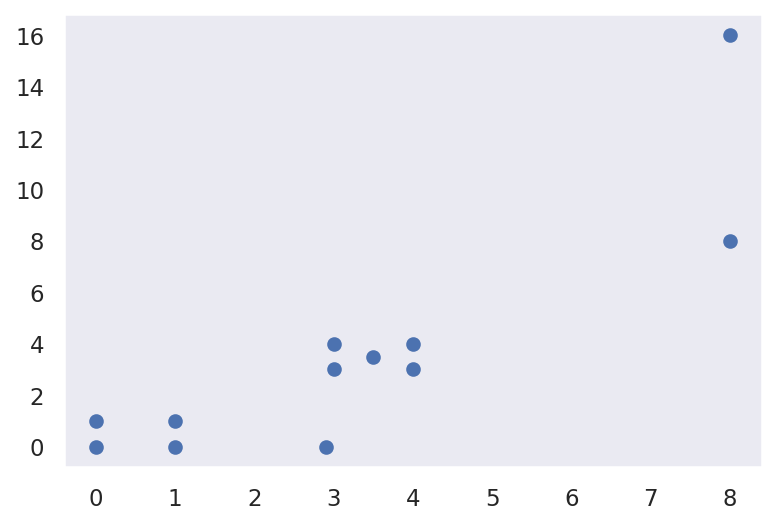

In [ ]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1],
              [2.9,0],
              
              [3,3],
              [3,4],
              [4,3],
              [3.5, 3.5],
              [4,4],
              
              [8,8],
              [8,16]])

plt.scatter(X[:,0], X[:,1]);

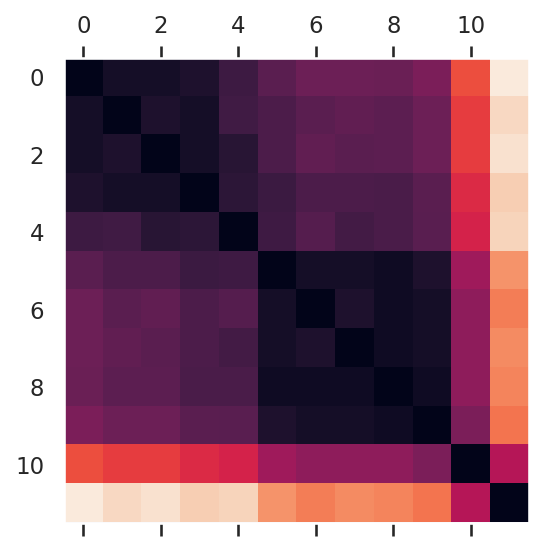

In [ ]:
from scipy.spatial import distance_matrix
distances = distance_matrix(X,X)
plt.matshow(distances)

In [ ]:
labels = np.ones(len(X)) * -1
eps = 2
min_pts = 2
labels

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
n_clusters = 0
for i in range(len(X)):
  print("-"*50)
  print(f"{i})")

  if labels[i] == -1:
    search(i,
           distances,
           eps,
           min_pts,
           labels,
           current_cluster=n_clusters,
           start=True)
    n_clusters += 1
  else:
    print(f"{i} is already in a cluster")

  print(labels)
  print()

--------------------------------------------------
0)
[ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.]

--------------------------------------------------
1)
1 is already in a cluster
[ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.]

--------------------------------------------------
2)
2 is already in a cluster
[ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.]

--------------------------------------------------
3)
3 is already in a cluster
[ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.]

--------------------------------------------------
4)
4 is already in a cluster
[ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1. -1.]

--------------------------------------------------
5)
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1. -1.]

--------------------------------------------------
6)
6 is already in a cluster
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1. -1.]

--------------------------------------------------
7)
7 is already in a cluster
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1. -1.]

----

# of clusters : 4



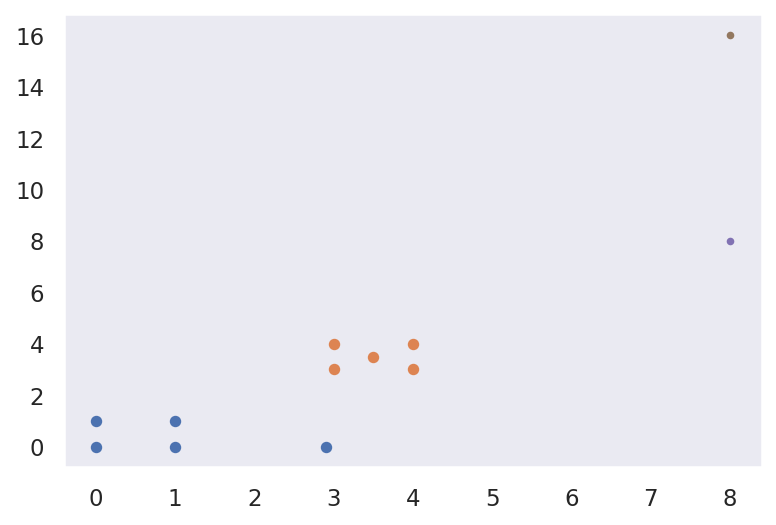

In [ ]:
print(f"# of clusters : {n_clusters}\n")

# for i in np.unique(labels):
#   plt.scatter(X[labels==i][:,0], X[labels==i][:,1])

# Plot Clusters
for i in range(n_clusters):
  plt.scatter(X[labels==i][:,0], X[labels==i][:,1], s=20)

# Plot Noise
for noise in X[labels==-1]:
  plt.scatter(noise[0], noise[1], s=7)

plt.show()

## Cleanup

# of Clusters : 2
# of Noise : 2



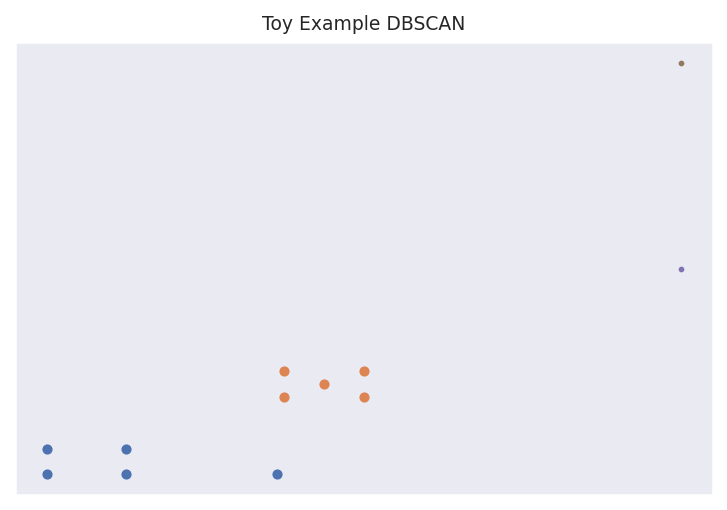

In [ ]:
labels = GHD_DBSCAN(X, debug=False, title="Toy Example DBSCAN")

## Loading Actual Data

In [ ]:
!wget -nc https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/ML_HW04.zip

File ‘ML_HW04.zip’ already there; not retrieving.



In [ ]:
!unzip -n "/content/ML_HW04.zip" -d "/content/ML_HW04/"

Archive:  /content/ML_HW04.zip


In [ ]:
# 2D
compound_df = pd.read_csv("/content/ML_HW04/ML_HW04/data/3/Compound.txt", sep="\t")
X_compound = compound_df.to_numpy()[:, :-1]
y_compound = compound_df.to_numpy()[:, -1]

d31_df = pd.read_csv("/content/ML_HW04/ML_HW04/data/3/D31.txt", sep="\t")
X_d31 = d31_df.to_numpy()[:, :-1]
y_d31 = d31_df.to_numpy()[:, -1]

pathbased_df = pd.read_csv("/content/ML_HW04/ML_HW04/data/3/pathbased.txt", sep="\t")
X_pathbased = pathbased_df.to_numpy()[:, :-1]
y_pathbased = pathbased_df.to_numpy()[:, -1]

spiral_df = pd.read_csv("/content/ML_HW04/ML_HW04/data/3/spiral.txt", sep="\t")
X_spiral = spiral_df.to_numpy()[:, :-1]
y_spiral = spiral_df.to_numpy()[:, -1]

# 3D
rings_df = pd.read_csv("/content/ML_HW04/ML_HW04/data/3/rings.txt", sep="\t")
X_rings = rings_df.to_numpy()[:, 1:]
y_rings = rings_df.to_numpy()[:, 0]


names  = ["Compound", "D31", "Path Based", "Spiral"]
X_list = [X_compound, X_d31, X_pathbased, X_spiral]
y_list = [y_compound, y_d31, y_pathbased, y_spiral]

In [ ]:
rings_df.head()

,1,28.75430164,6.011077585,50.99722013
0,1,80.458213,7.425220,50.907384
1,1,68.533113,62.922355,49.856104
2,1,54.375681,67.387020,50.214917
3,1,74.430772,4.421254,51.687489
4,1,48.691230,65.791123,50.940461


## A) DBSCAN Clustering



#### Compound

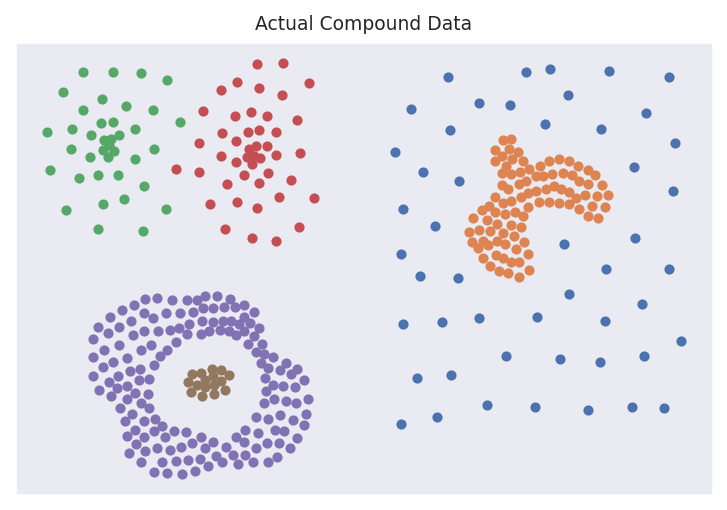

In [ ]:
# Plot Actual labels
plt.title("Actual Compound Data",fontsize=9)
plt.xticks([])
plt.yticks([])
for i in np.unique(y_compound):
  plt.scatter(X_compound[y_compound==i][:,0], X_compound[y_compound==i][:,1], s=15)

# of Clusters : 5
# of Noise : 62



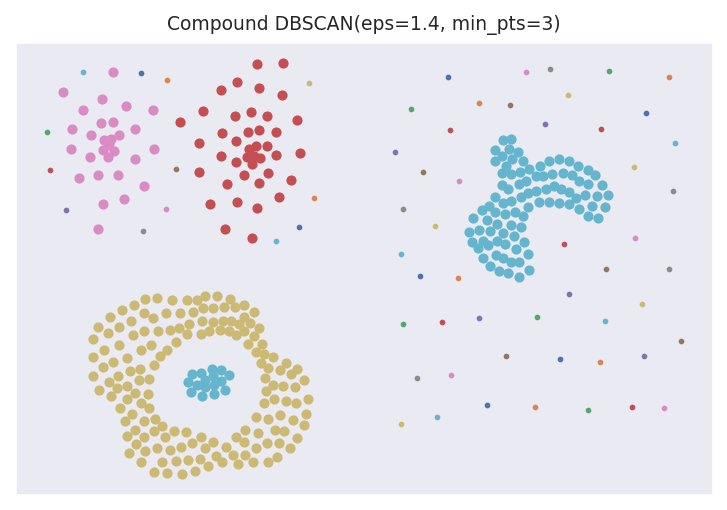

In [ ]:
labels_compound = GHD_DBSCAN(X_compound, eps=1.4, min_pts=3, debug=False, title="Compound DBSCAN(eps=1.4, min_pts=3)");print()

#### Path-Based

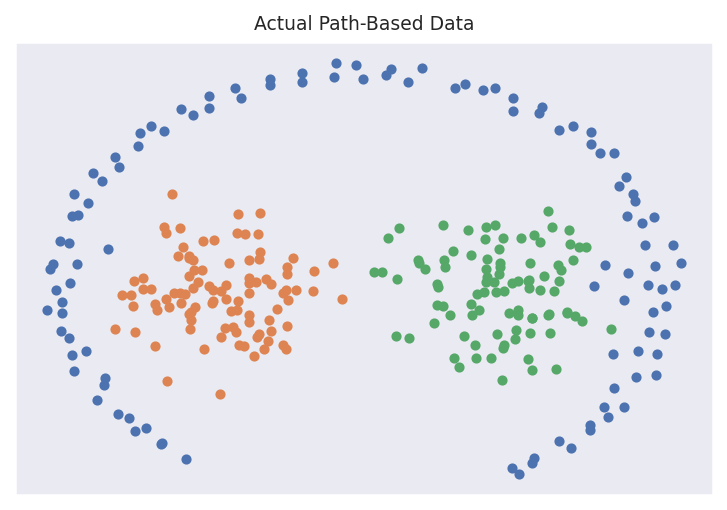

In [ ]:
# Plot Actual labels
plt.title("Actual Path-Based Data",fontsize=9)
plt.xticks([])
plt.yticks([])
for i in np.unique(y_pathbased):
  plt.scatter(X_pathbased[y_pathbased==i][:,0], X_pathbased[y_pathbased==i][:,1], s=15)

# of Clusters : 1
# of Noise : 71



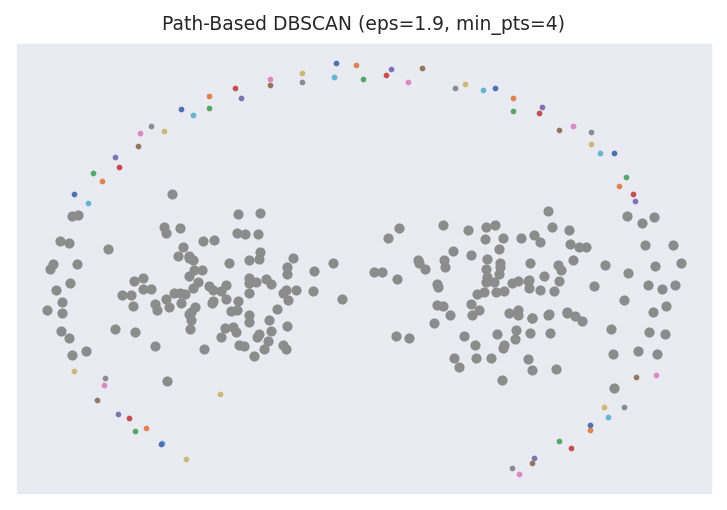

In [ ]:
labels_pathbased = GHD_DBSCAN(X_pathbased, eps=3, min_pts=11, debug=False, title="Path-Based DBSCAN (eps=1.9, min_pts=4)");print()

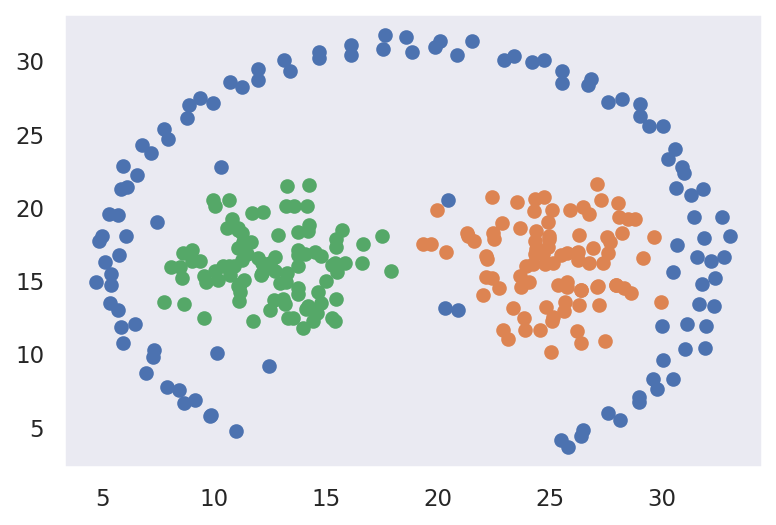

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=2.1, min_samples=11)
y_pred = dbs.fit_predict(X_pathbased)

for i in(np.unique(dbs.labels_)):
  plt.scatter(X_pathbased[dbs.labels_==i][:,0], X_pathbased[dbs.labels_==i][:,1], cmap="viridis")

In [ ]:
len(np.unique(dbs.labels_))

3

#### Spiral

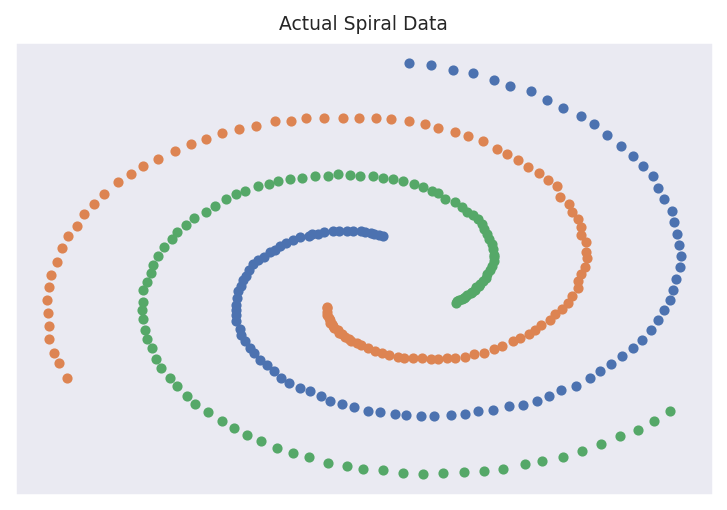

In [ ]:
# Plot Actual labels
plt.title("Actual Spiral Data",fontsize=9)
plt.xticks([])
plt.yticks([])
for i in np.unique(y_spiral):
  plt.scatter(X_spiral[y_spiral==i][:,0], X_spiral[y_spiral==i][:,1], s=15)

# of Clusters : 3
# of Noise : 0



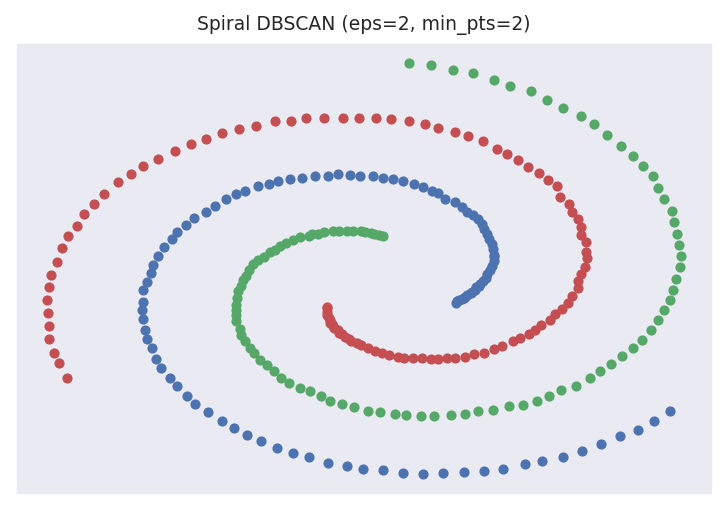

In [ ]:
labels_spiral = GHD_DBSCAN(X_spiral, debug=False, title="Spiral DBSCAN (eps=2, min_pts=2)");print()

#### D31

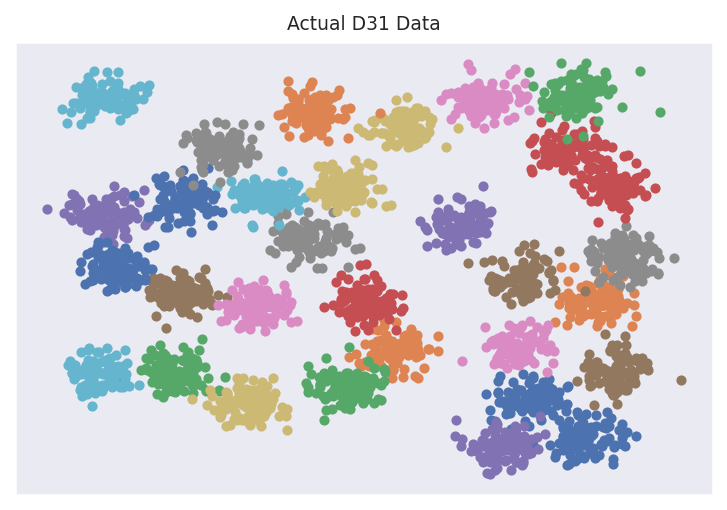

In [ ]:
# Plot Actual labels
plt.title("Actual D31 Data", fontsize=9)
plt.xticks([])
plt.yticks([])
for i in np.unique(y_d31):
  plt.scatter(X_d31[y_d31==i][:,0], X_d31[y_d31==i][:,1], s=15)

# of Clusters : 31
# of Noise : 207



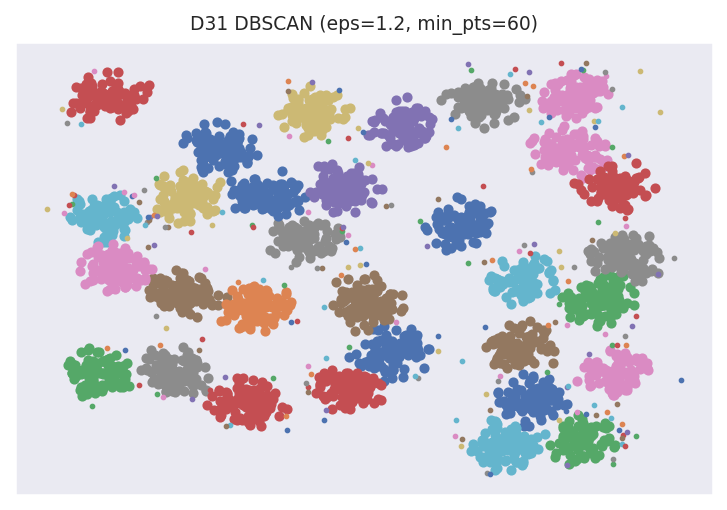

In [ ]:
# Maximum Recursion Depth Exceeded for d31
import sys
sys.setrecursionlimit(2500) # Band-aid

labels_d31 = GHD_DBSCAN(X_d31, eps=1.2, min_pts=60, debug=False, title="D31 DBSCAN (eps=1.2, min_pts=60)");print()

####Rings

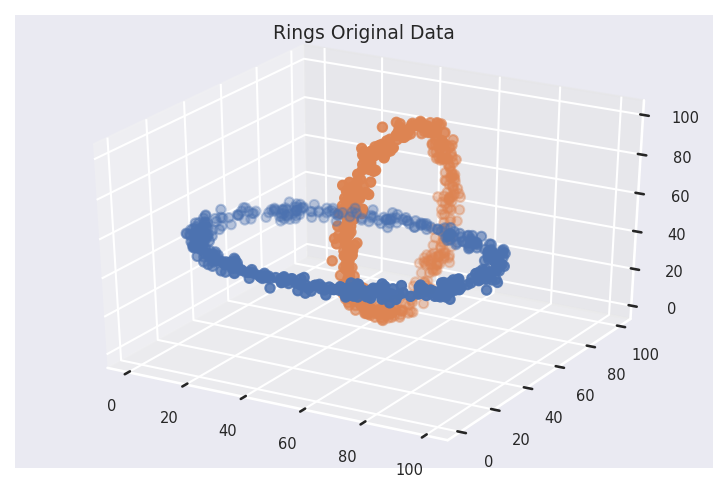

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(xs = X_rings[y_rings==1][:, 0], ys = X_rings[y_rings==1][:, 1], zs = X_rings[y_rings==1][:, 2])
ax.scatter(xs = X_rings[y_rings==2][:, 0], ys = X_rings[y_rings==2][:, 1], zs = X_rings[y_rings==2][:, 2])
plt.title("Rings Original Data", fontsize=9)
plt.show()

In [ ]:
labels_rings = GHD_DBSCAN(X_rings, eps=20, min_pts=8,debug=False, plot=False)

# of Clusters : 2
# of Noise : 0



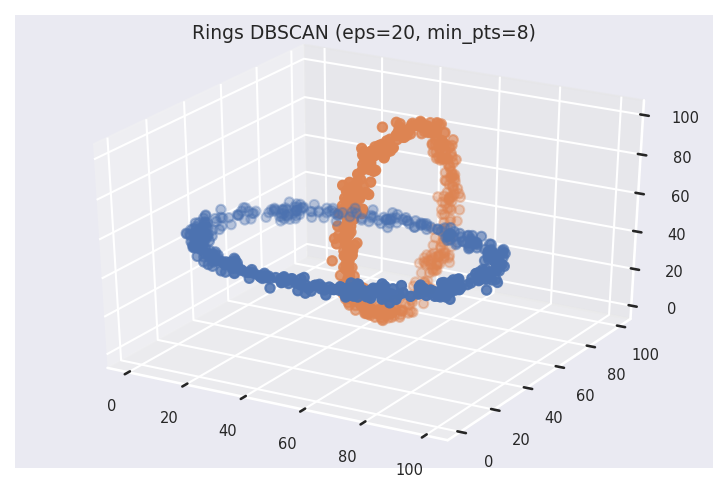

In [ ]:
#Plotting Ring DBSCAN
import matplotlib
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")

for i in np.unique(labels_rings):
  ax.scatter(xs = X_rings[labels_rings==i][:, 0], ys = X_rings[labels_rings==i][:, 1], zs = X_rings[labels_rings==i][:, 2])


if len(labels_rings[labels_rings==-1])>0:
  print(f"# of Clusters : {len(np.unique(labels_rings))-1}")
  print(f"# of Noise : {len(labels_rings[labels_rings==-1])}\n")
else:
  print(f"# of Clusters : {len(np.unique(labels_rings))}")
  print(f"# of Noise : {len(labels_rings[labels_rings==-1])}\n")

plt.title("Rings DBSCAN (eps=20, min_pts=8)", fontsize=9)
plt.show()

## B) Purity


In [ ]:
purity_compound = purity_score(labels_compound, y_compound)
print(f"Purity Score for 'Compound' is \t {purity_compound:.3f}")

purity_pathbased = purity_score(labels_pathbased, y_pathbased)
print(f"Purity Score for 'Path-based' is {purity_pathbased:.3f}")

purity_spiral = purity_score(labels_spiral, y_spiral)
print(f"Purity Score for 'Spiral' is \t {purity_spiral:.3f}")

purity_d31 = purity_score(labels_d31, y_d31)
print(f"Purity Score for 'D31' is \t {purity_d31:.3f}")

purity_rings = purity_score(labels_rings, y_rings)
print(f"Purity Score for 'Rings' is \t {purity_rings:.3f}")

Purity Score for 'Compound' is 	 0.965
Purity Score for 'Path-based' is 0.946
Purity Score for 'Spiral' is 	 1.000
Purity Score for 'D31' is 	 0.914
Purity Score for 'Rings' is 	 1.000
